# 17. 이미지 검출 (경계선)

## Canny Edge Detection

- canny 함수

예제 이미지 : https://pixabay.com/images/id-1300089/  
크기 : 1280 x 904  
파일명 : christmas-1300089_640.png

In [16]:
 import cv2
img = cv2.imread('christmas-1300089_640.png')

canny = cv2.Canny(img, 150, 200) # 대상 이미지, minVal (하위임계값), maxVal (상위임계값)
# 픽셀의 변화가 크면 (200보다 크면) 경계선으로 간주, 150보다 작으면 경계선으로 간주하지 않음
# 빨간색에서 다른 색으로 넘어갈때(색깔의 경계선) 의 임계값을 비교, 200을 넘어가면 경계선을 그려줌

cv2.imshow('img', img)
cv2.imshow('canny', canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 결과값 

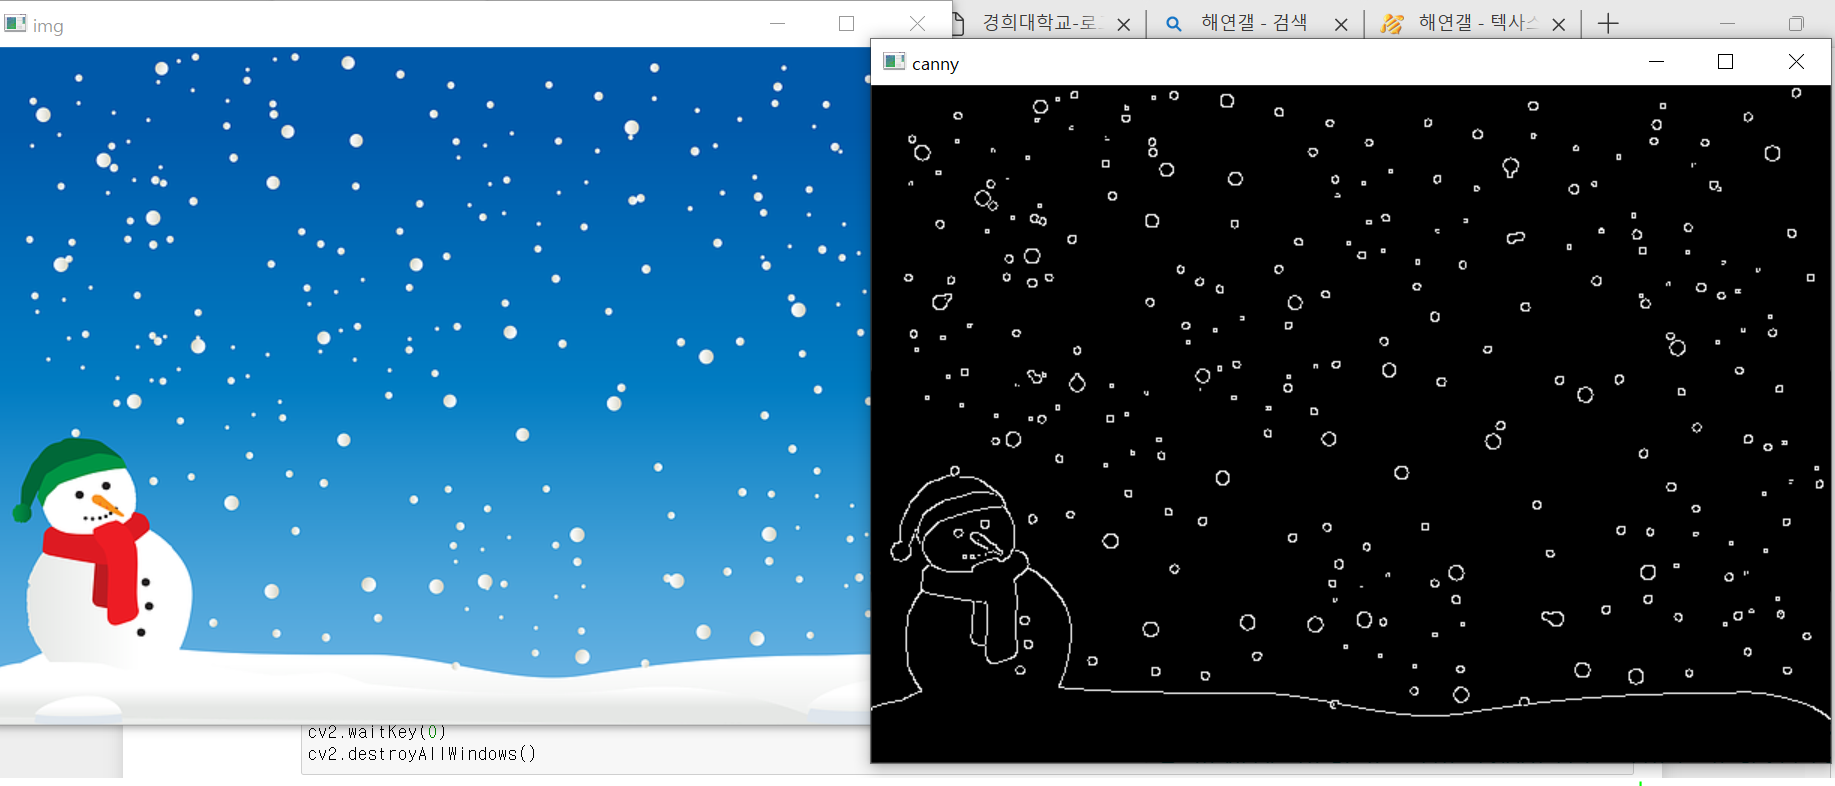

In [2]:
# 만약 trackbar로 조정해보면서 경계선이 어떻게 변화할지 알아보기 

import cv2


def empty(pos) :
    pass

img = cv2.imread('christmas-1300089_640.png')

name = "Trackbar"
cv2.namedWindow(name)
cv2.createTrackbar('threshold1', name, 0, 255, empty) #minvalue
cv2.createTrackbar('threshold2', name, 0, 255, empty) #maxvalue

while True : 
    threshold1 = cv2.getTrackbarPos('threshold1', name)
    threshold2 = cv2.getTrackbarPos('threshold2', name)
    
    canny = cv2.Canny(img, threshold1, threshold2)
    
    cv2.imshow('img', img)
    cv2.imshow(name, canny)
    
    if cv2.waitKey(1) == ord('q') :
        break
        
cv2.destroyAllWindows()

## 결과값

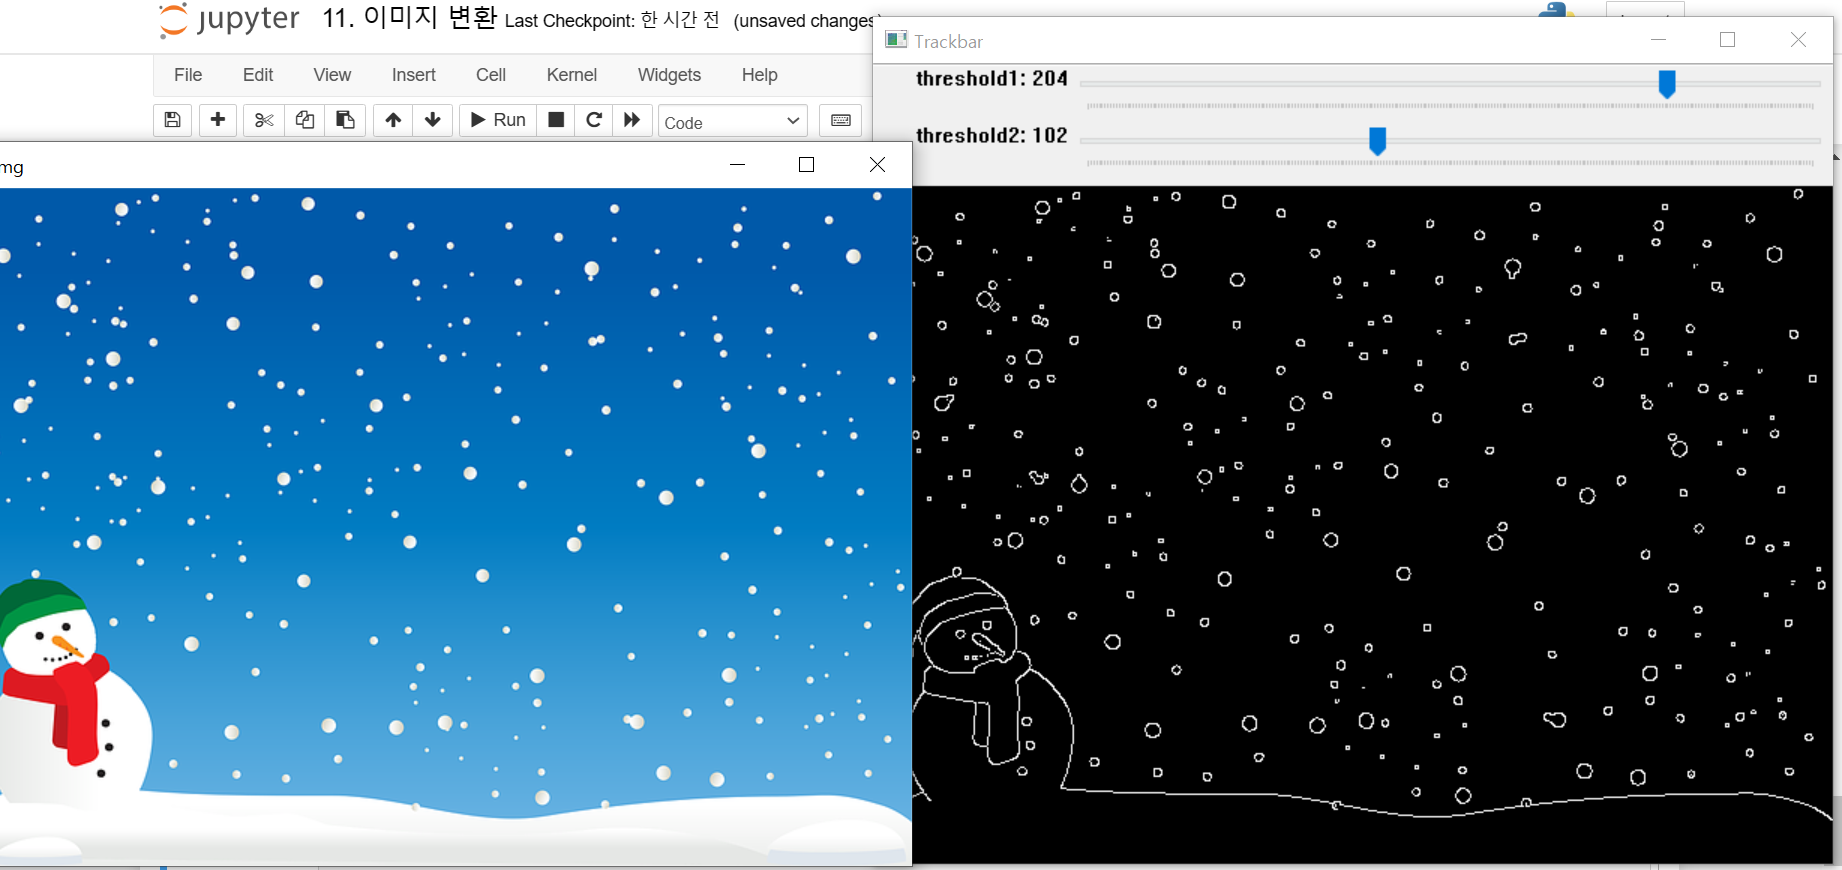

# 18. 이미지 검출 (윤곽선)

## 윤곽선 (Contour) : 경계선을 연결한 선

- findContours

예제 이미지 : https://pixabay.com/images/id-161404/  
크기 : 640 x 408  
파일명 : cards-161404_640.png

In [ ]:
# 이미지 불러오기 
import cv2
img = cv2.imread('cards-161404_640.png')
target_img = img.copy() # 사본 이미지 복사

# binary 이미지 만들기 전에 흑백 처리
# 정확도를 높이기 위해 binary이미지를 사용해서 윤곽선 검출
# otsu를 쓰면 최적의 임계값을 찾아 binary화해줌
# otsu로 미리 선을 따놓는다는 느낌?

gray = cv2.cvtColor(img, COLOR_BGRGRAY)
ret, otsu = cv2.threshold(gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)


contours, hierarchy = cv2.findContours(otsu, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE) # 윤곽선 검출
# 윤곽선정보, 계층 구조
# (이미지, 윤곽선 찾는 모드 (mode), 윤곽선 찾을때 사용하는 근사치 방법 (method) : CHAIN_APPROX_NONE, CHAIN_APPROX_SIMPLE)

COLOR = (0, 200, 0) # 녹색
cv2.drawContours(target_img, contours, -1, COLOR, 2) # 윤곽선 그리기
# 윤곽선 그릴 대상 이미지, 윤곽선 정보, 인덱스 (-1 이면 전체), 색깔, 두께

cv2.imshow('img', img)
cv2.imshow('gray', gray)
cv2.imshow('otsu', otsu)
cv2.imshow('contour', target_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 결과값

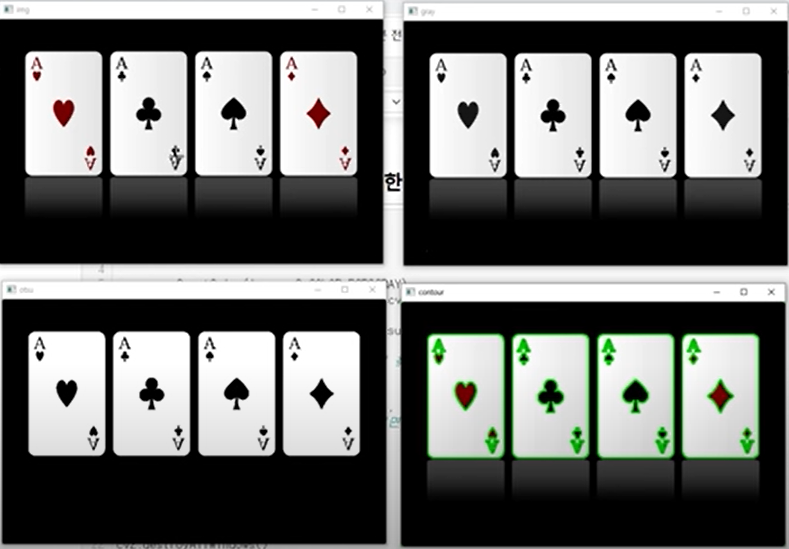

# 윤곽선 찾기 모드
1. cv2.RETR_EXTERNAL : 가장 외곽의 윤곽선만 찾음
1. cv2.RETR_LIST : 모든 윤곽선 찾음 (계층 정보 없음)
1. cv2.RETR_TREE : 모든 윤곽선 찾음 (계층 정보를 트리 구조로 생성)


1. cv2.CHAIN_APPROX_NONE : 모든 윤곽선 반환
1. cv2.CHAIN_APPROX_SIMPLE : 꼭짓점만, 메모리 줄일 수 이씀

#### 계층정보가 있이 찾아주는 거
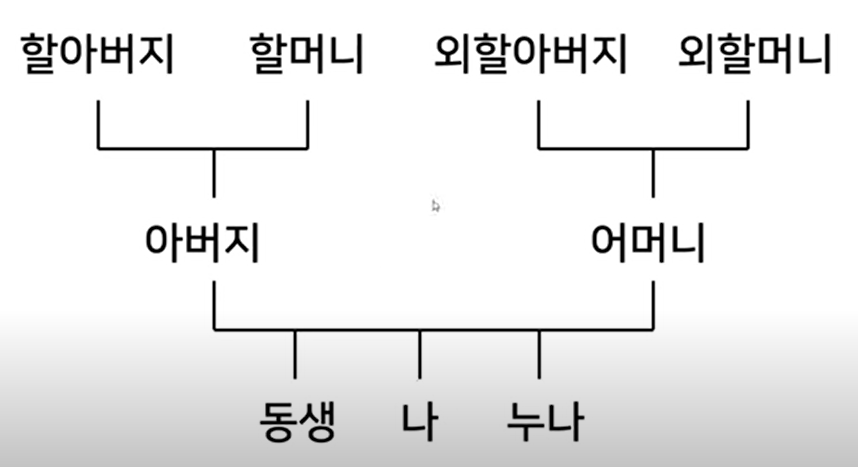

#### 계층정보 없이 찾아주면 저런 선없이 다 일렬로 출력

In [3]:
#cv2.RETR_EXTERNAL

import cv2
img = cv2.imread('cards-161404_640.png')
target_img = img.copy() # 사본 이미지

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, otsu = cv2.threshold(gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# contours, hierarchy = cv2.findContours(otsu, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours, hierarchy = cv2.findContours(otsu, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# contours, hierarchy = cv2.findContours(otsu, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# print(hierarchy)
# print(f'총 발견 갯수 : {len(contours)}')

COLOR = (0, 200, 0) # 녹색
cv2.drawContours(target_img, contours, -1, COLOR, 2)

cv2.imshow('img', img)
cv2.imshow('gray', gray)
cv2.imshow('otsu', otsu)
cv2.imshow('contour', target_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 결과값

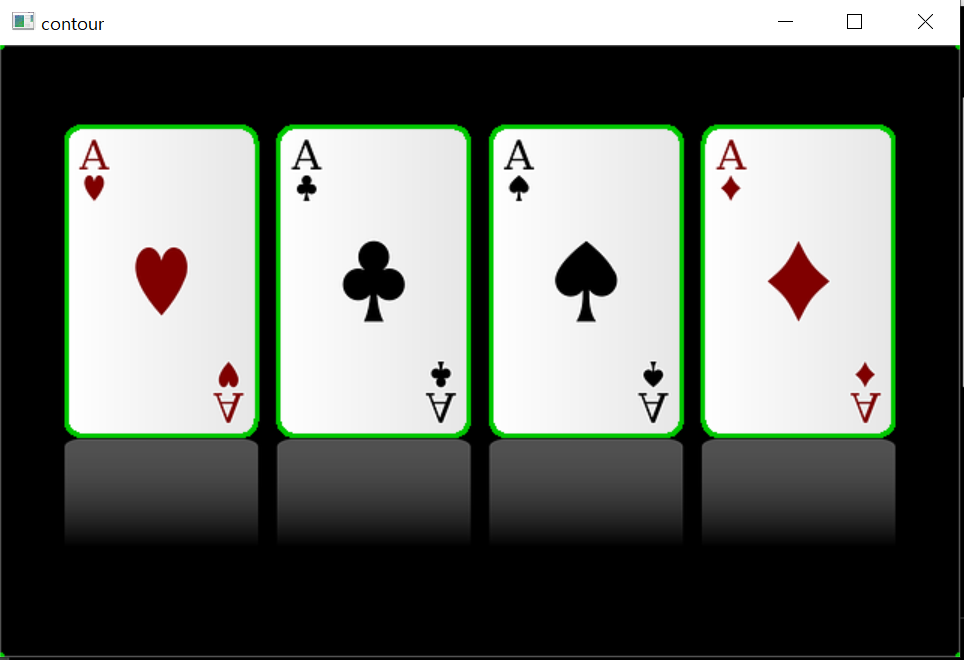

제일 외곽만 찾아줌

In [4]:
#cv2.RETR_LIST

import cv2
img = cv2.imread('cards-161404_640.png')
target_img = img.copy() # 사본 이미지

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, otsu = cv2.threshold(gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# contours, hierarchy = cv2.findContours(otsu, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours, hierarchy = cv2.findContours(otsu, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# contours, hierarchy = cv2.findContours(otsu, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# print(hierarchy)
# print(f'총 발견 갯수 : {len(contours)}')

COLOR = (0, 200, 0) # 녹색
cv2.drawContours(target_img, contours, -1, COLOR, 2)

cv2.imshow('img', img)
cv2.imshow('gray', gray)
cv2.imshow('otsu', otsu)
cv2.imshow('contour', target_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 결과값 

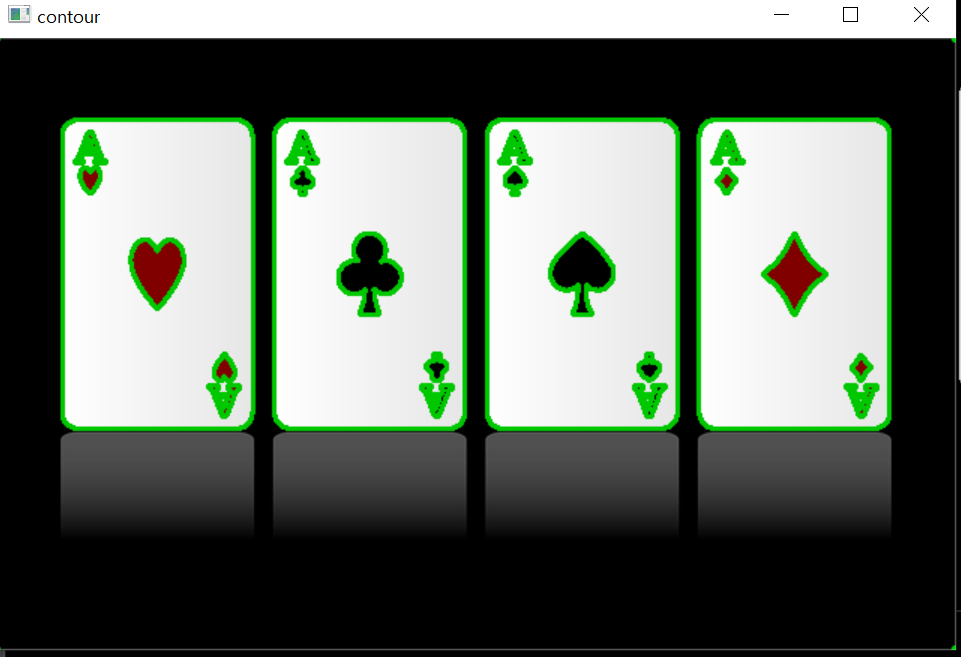

- print(hierarchy)하면 숫자가 쭉 뜸

## 경계 사각형
윤곽선의 경계면을 둘러싸는 사각형
> boundingRect()

In [ ]:
#위에서 찾은 윤곽선을 둘러싸는 사각형 찾기

import cv2
img = cv2.imread('cards-161404_640.png')
target_img = img.copy() # 사본 이미지

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, otsu = cv2.threshold(gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)


contours, hierarchy = cv2.findContours(otsu, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE) #contuours에 윤곽선 정보가 전부 다 들어있음 


COLOR = (0, 200, 0) # 녹색

for cnt in countours : 
    x,y,width, height = cv2.boundingRect(cnt) #countours에 있는 정보 반환 -> rectangle로 묶기
    cv2.rectangle(target_img, (x, y), (x + width, y + height), COLOR, 2) # targe_img 위에 사각형 그림, 2 -> 두께


cv2.imshow('img', img)
cv2.imshow('gray', gray)
cv2.imshow('otsu', otsu)
cv2.imshow('contour', target_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 결과값

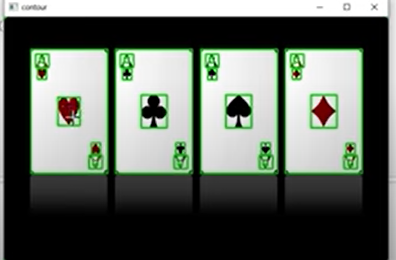

## 면적
> contourArea()

In [12]:
import cv2
img = cv2.imread('cards-161404_640.png')
target_img = img.copy() # 사본 이미지

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, otsu = cv2.threshold(gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(otsu, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

COLOR = (0, 200, 0) # 녹색

for cnt in contours:
    if cv2.contourArea(cnt) > 25000: # 면적이 25000보다 큰 사각형만 검출하겠다. 
        x, y, width, height = cv2.boundingRect(cnt)
        cv2.rectangle(target_img, (x, y), (x + width, y + height), COLOR, 2) # 사각형 그림

cv2.imshow('img', img)
cv2.imshow('contour', target_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 결과값

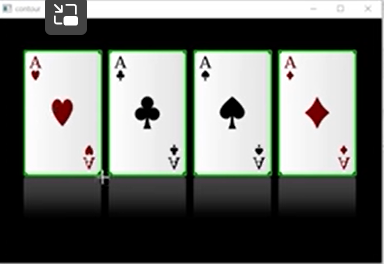

## 미니 프로젝트 : 개별 카드 추출해서 파일 저장

: 특정 파일을 불러와서 특정 범위 이상의 컨투어값을 갖는 녀석들을 각각 떼와서 파일로 저장하는 것

In [ ]:
import cv2
img = cv2.imread('cards-161404_640.png')
target_img = img.copy() # 사본 이미지

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, otsu = cv2.threshold(gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(otsu, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

COLOR = (0, 200, 0) # 녹색

idx = 1
for cnt in contours:
    if cv2.contourArea(cnt) > 25000:
        x, y, width, height = cv2.boundingRect(cnt)
        cv2.rectangle(target_img, (x, y), (x + width, y + height), COLOR, 2) # 사각형 그림
        
        #개별 카드를 추출하기 위해 crop이라는 함수 사용
        crop = img[y:y+height, x:x+width] # [세로, 가로의 범위 지정]
        cv2.imshow(f'card_crop_{idx}', crop) # 첫번째 윤곽선은? 하고 창 -> 두번째 윤곽선은?하고 창 이런식으로 뜰 예정
        cv2.imwrite(f'card_crop_{idx}.png', crop) # 파일 저장
        idx += 1

cv2.imshow('img', img)
cv2.imshow('contour', target_img)

cv2.waitKey(0)
cv2.destroyAllWindows()